# Analyze The Sentiment of Tweets From Twitter Data and Tweepy in Python

**Learning Objectives**

**After completing this tutorial, you will be able to:**

1. Explain how text data can be analyzed to identify sentiments (i.e. attitudes) toward a particular subject.
2. Analyze sentiments in tweets

# Sentiment Analysis

Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.

In this lesson, you will apply sentiment analysis to Twitter data using the Python package **textblob.** You will calculate a polarity value for each tweet on a given subject and then plot these values in a histogram to identify the overall sentiment toward the subject of interest.

**Get and Clean Tweets Related to Climate**

Begin by reviewing how to search for and clean tweets that you will use to analyze sentiments in Twitter data.

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

Remember to define your keys:

In [12]:
consumer_key = "Edp8l71sifu---------"
consumer_secret = "N7B4TJMMa6uRfVAMtkALVBX--------------"
access_token = "1245761650126356481-aelRrwD3c----------------"
access_token_secret = "CWK2yk2kbYYdWL1ivYCFR-----------------------"

In [13]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Grab and clean up 1000 recent tweets. For this analysis, you only need to remove URLs from the tweets.

In [34]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [15]:
# Create a custom search term and define the number of tweets
search_term = "#covid19+pandemic -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)



In [16]:
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

**Analyze Sentiments in Tweets**

You can use the Python package textblob to calculate the polarity values of individual tweets on climate change.

Begin by creating textblob objects, which assigns polarity values to the tweets. You can identify the polarity value using the attribute .polarity of texblob object.

In [17]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]


In [18]:
sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("16 Health Workers Talk About Their Battles With the Pandemic pandemic COVID19 Covid19UK"))

You can apply list comprehension to create a list of the polarity values and text for each tweet, and then create a **Pandas Dataframe** from the list.

In [20]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values[0]

[0.0,
 '16 Health Workers Talk About Their Battles With the Pandemic pandemic COVID19 Covid19UK']

In [25]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head(25)

,polarity,tweet
0,0.000000,16 Health Workers Talk About Their Battles Wit...
1,0.000000,Here is what our employees say about Ged Lawye...
2,-0.400000,Tips for game devs in the era of COVID19eg If ...
3,0.136364,COVID19 New York saw the fewest new daytoday C...
4,0.000000,Teaching during COVID19 Why Were FortunateIf t...
5,0.000000,Were looking at retirement savings as a rainyd...
6,-0.500000,ON AIR COVID19 Ethiopian President SahleWorkZe...
7,0.000000,With the ongoing COVID19 Pandemic amp the rece...
8,0.800000,This is a great innovation that can help fight...
9,0.100000,Bangladesh has battled the twin perils of Amph...


These polarity values can be plotted in a histogram, which can help to highlight in the overall sentiment (i.e. more positivity or negativity) toward the subject.

Text(0.5, 1.0, 'Sentiment from Tweets on Climate Change')

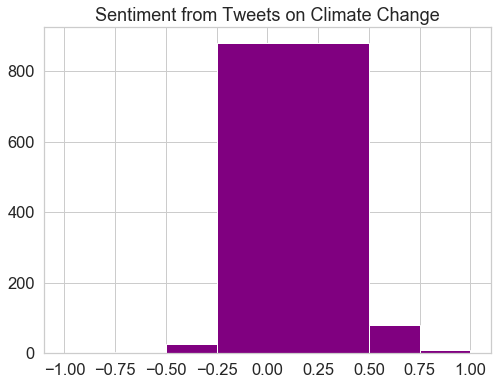

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

#Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5,-0.25,0.5,0.75,1],
                 ax=ax,
                 color="purple")
plt.title("Sentiment from Tweets on Climate Change")

This plot displays a histogram of polarity values for tweets on climate change.

To get a better visual of the polarity values, it can be helpful to remove the polarity values equal to zero and create a break in the histogram at zero.

In [28]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

Text(0.5, 1.0, 'Sentiments from Tweets on Climate Change')

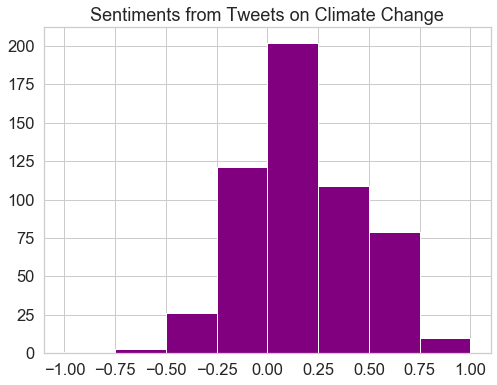

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")

This plot displays a revised histogram of polarity values for tweets on covid19 pandemic. For this histogram, polarity values equal to zero have been removed, and a break has been added at zero, to better highlight the distribution of polarity values.

What does the histogram of the polarity values tell you about sentiments in the tweets gathered from the search “#Covid19+pandemic -filter:retweets”? **Are they more positive or negative?**

# Get and Analyze Tweets Related to the George Floyd

Explore a new topic,the 2020 Death of African American George Floyd in the hands of a police officer During the Corona Pandemic

In [42]:
search_term = "George+Floyd -filter:retweets"

tweets = tw.Cursor(api.search,
                  q= search_term,
                  lang='en',
                  since='2020-5-28').items(1000)


In [43]:
#Remove URLs and create textblob objectfor each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:20]

[TextBlob("xhotpocketz dasludacris LedgeDC Texanpigbttm I know that youre punishing people that had nothing to do with"),
 TextBlob("via NYTimes Trump is itching to use the Insurrection Act He could send the military into any city with a protes"),
 TextBlob("Mayor Jacob Frey Justice for George Floyd Sign the Petition via UKChange"),
 TextBlob("3 more cops charged in George Floyd death other officers murder charge upgraded Sen Klobuchar says"),
 TextBlob("College rescinds recruits admission over George Floyd post"),
 TextBlob("At least 9300 people have been arrested in protests across the country since George Floyds death according to an"),
 TextBlob("Klobuchar 3 more cops charged in Floyd death"),
 TextBlob("Im not physically comfortable kneeling at the best of times due to old injurybut also uncomfortable with white f"),
 TextBlob("George FloydImprisoned for a theft in August 1998Arrested in 2002 for criminal trespassing and served 30 days"),
 TextBlob("Chris Hayes on how police treat

Then, you can create the Pandas Dataframe of the polarity values and plot the histogram for the Camp Fire tweets, just like you did for the climate change data.

In [46]:
# Calculate polarity of tweets
George_Floyd_values = [[tweet.sentiment.polarity,str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
GF_sent_df = pd.DataFrame(George_Floyd_values, columns=["polarity", "tweet"])
GF_sent_df = GF_sent_df[GF_sent_df.polarity != 0]

GF_sent_df.head(20)


,polarity,tweet
1,-0.100000,via NYTimes Trump is itching to use the Insurr...
3,0.187500,3 more cops charged in George Floyd death othe...
5,-0.300000,At least 9300 people have been arrested in pro...
6,0.500000,Klobuchar 3 more cops charged in Floyd death
7,0.045833,Im not physically comfortable kneeling at the ...
8,-0.400000,George FloydImprisoned for a theft in August 1...
9,-0.166667,Chris Hayes on how police treat black American...
10,0.200000,scott19853 george floyd was a trigger but his ...
12,0.050000,To the lawyers on here does it make a convicti...
13,0.500000,For the love of God We literally watched him d...


Text(0.5, 1.0, "Sentiments from Tweets on George Floyd's Death")

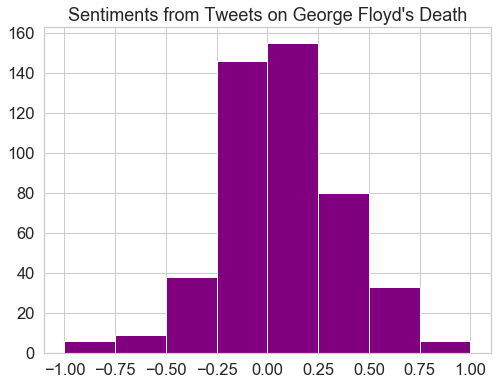

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

GF_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on George Floyd's Death")

This plot displays a histogram of polarity values for tweets on the Death of George Floyd. For this histogram, polarity values equal to zero have been removed and a break has been added at zero, to better highlight the distribution of polarity values.

**Based on this histogram, would you say that the sentiments from George Floys's Death tweets are more positive or negative?**